# Relatório Simulação 1 - Projétil
 ### Mariana Furtado dos Santos, RA: 150209


# Descrição Geral do Sistema Simulado

Simulação computacional de um lançamento oblíquo de um projétil de massa 10, nos ângulos de 30° , 45° e 60°. Analisando a velocidade, deslocamento e a energia de acordo com o decorrer do trajeto e considerando a resistência do ar. 
Simulando também caso o contato com o solo for completamente elástico.

Para todos os resultados serão consideradas as unidades do SI.

Será analisado o que ocorre em cada movimento dentro de um espaço de tempo Tmax.

Equações:


$\frac{dv}{dt} = g$

$Epg=mgh$

$Ec=\frac{mv^2}{2}$

$Em=Ec+Epg$

$Et=Em+Ed$

$V_y = V_{y0} + (g-\frac{k}{m}.V_{y0}).dt$

$V_x = V_{x0} + (-\frac{k}{m}.V_{x0}).dt$

$V = \sqrt{Vx^2 + Vy^2}$

$S_x = S_0x + v.dt$

$S_y = S_0y + v.dt$


In [ ]:
# Bibliotecas
import numpy as np
from matplotlib import pyplot as plt
import math

# Simulação 01 - Cálculos e Resultados

Ângulo do lançamento:
>Theta = 45°

Porcentagem da velocidade mantida após tocar o solo:
>w = 0%


### Parâmetros

In [ ]:
DT = 0.01 #intervalo de tempo
g = -10 #gravidade
H = 0 #altura inicial
Tmax = 10 #tempo maximo
V0 = 50 #velocidade inicial
theta = math.radians(45) #angulo de lancamento
w = 0 #coef de perda de velocidade ao tocar o solo
Vy = V0*math.sin(theta)
Vx = V0*math.cos(theta)
S0 = 0

vely = [Vy] #velocidades em y
velx = [Vx] #velociaddes em x
vel = [] #velocidades
spy = [0] #posicoes em y
spx = [0] #posicoes em x

Sx = 0
Sy = 0
k = 0.5
m = 10

Eg = [] #Energia gravitacional
Ec = [] #Energia cinética
Em = [] #Energia Mecânica
Et = [] #Energia Total
Ed = [] #Energia Dissipada


###Cálculos

In [ ]:
for t in np.arange(DT, Tmax, DT):

    # calcula as velocidades nos eixos x e y
    DVy = (g-(k/m)*Vy)*DT
    Vy = Vy + DVy

    DVx = (-k*Vx/m)*DT
    Vx = Vx + DVx 
    
    # soma a velocidade a partir das componentes
    V = math.sqrt(Vy**2 + Vx**2)

    vely.append(Vy)
    velx.append(Vx)
    vel.append(V)
    
    # calcula as energias: potencial(gravitavional), cinetica, mecanica, dissipada e total
    Eg.append(-g*m*Sy)
    Ec.append(1/2*m*V**2)
    Em.append((1/2*m*V**2) + (-g*m*Sy))
    Et.append(1/2*m*V0**2)
    Ed.append ((1/2*m*V0**2)-((1/2*m*V**2) + (-g*m*Sy)))

    # calcula a posicao em x e y ao passar do tempo
    Sx = Sx + DT*Vx
    Sy = Sy + DT*Vy
    
    spy.append(Sy)
    spx.append(Sx)
    
    # calcula a posicao seguinte em y para saber quando toca o solo (passa pelo 0)
    DVyax = DVy
    Vyax = Vy
    DVyax = DVy
    
    DVyax = (g-(k/m)*Vy)*(DT+0.1)
    Vyax = Vyax + DVyax
    Syax = Sy + DT*Vy

    # quando toca o solo, inverte o movimento em y com perda 'w' de velocidade
    if Syax < 0 and Vx < 0:
      break
    if Sx > 0 and Syax < 0 and w != 0:
       Vy=Vy*(-w)
       Vx=Vx*(w)
    if Sx > 0 and Syax < 0 and w == 0:
      break

In [ ]:
# Porcentagem da energia dissipada
porcentagem = ((1/2*m*V0**2)-((1/2*m*V**2) + (-g*m*Sy))) * 100 / (1/2*m*V0**2)
porcentagem = round(porcentagem, 2)
print (porcentagem,'%')
print(max(spy))

34.57 %
55.79979858755008


## Gráficos e Análises

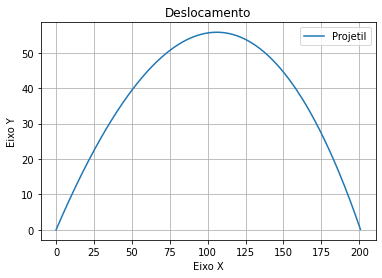

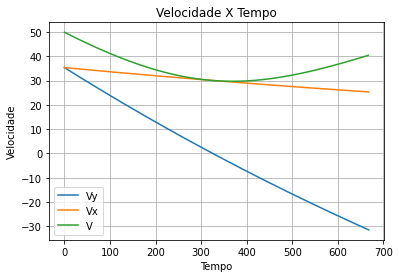

Gráfricos das energias


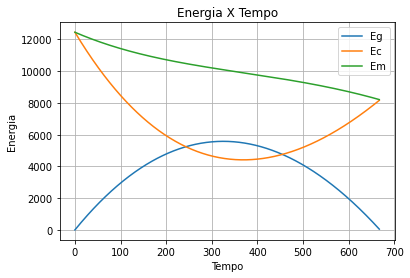

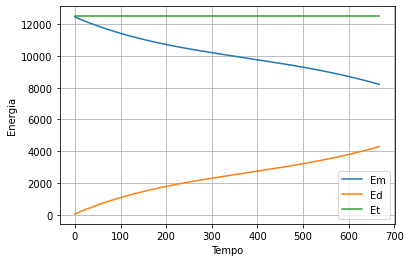

In [ ]:
plt.figure(1)
plt.plot(spx, spy, label='Projetil')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Deslocamento')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(vely, label='Vy') 
plt.plot(velx, label='Vx') 
plt.plot(vel, label = 'V') 
plt.xlabel('Tempo')
plt.ylabel('Velocidade')
plt.title('Velocidade X Tempo')
plt.legend()
plt.grid(True)
plt.show()

print('Gráfricos das energias')
plt.figure(3)
plt.plot(Eg, label='Eg')
plt.plot(Ec, label='Ec')
plt.plot(Em, label='Em')
plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.title('Energia X Tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(4)
plt.plot(Em, label='Em')
plt.plot(Ed, label='Ed')
plt.plot(Et, label='Et')
plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.legend()
plt.grid(True)
plt.show()



***ANÁLISE***


* No gráfico 1 pode-se observar que, após o lançamento, a partícula atinge a altura máxima de 55,8m e o alcance horizontal de 200,72m. No entanto, como a colisão é completamente inelástica, o movimento é encerrado ao tocar o chão.
* Já no gráfico 2, no qual é observada a relação entre as componentes horizontal e vertical da velocidade e a velocidade total, tem-se que:
    *   Vy faria de forma quadrática, formando uma parábola no gráfico. Tal variação é resultado da ação do peso e da força de atrito;
    *   Vx, no entanto, varia de forma linear e essa variação é resultante apenas da influência do atrito.
* No gráfico 3, vê-se que, nos extremos do movimento, onde a altura é 0m, a Ec se iguala à Em, enquanto a Epg é zerada. Em contrapartida, no ponto de altura máxima, a Ec atinge o seu valor mínimo, pois Vy=0.
*  Por fim, observando o gráfico 4 e o resultado obtido nos cálculos, a dissipação da energia para esta simulação é de 34,57%. Nesse caso, foi causada em totalidade pelo atrito.


# Simulação 02 - Cálculos e Resultados
Angulo do lançamento:
> Theta = 30°


Porcentagem da velocidade preservada após tocar o solo:
> w = 90%



###Parâmetros

In [ ]:
DT = 0.01 #intervalo de tempo
g = -10 #gravidade
H = 0 #altura inicial
Tmax = 10 #tempo maximo
V0 = 50 #velocidade inicial
theta = math.radians(30) #angulo de lancamento
w = 0.9 #coef de perda de velocidade ao tocar o solo
Vy = V0*math.sin(theta)
Vx = V0*math.cos(theta)
S0 = 0

vely = [Vy] #velocidades em y
velx = [Vx] #velociaddes em x
vel = [] #velocidades
spy = [0] #posicoes em y
spx = [0] #posicoes em x

Sx = 0
Sy = 0
k = 0.5
m = 10

Eg = [] #Energia gravitacional
Ec = [] #Energia cinética
Em = [] #Energia Mecânica
Et = [] #Energia Total
Ed = [] #Energia Dissipada


###Cálculos

In [ ]:
for t in np.arange(DT, Tmax, DT):

    # calcula as velocidades nos eixos x e y
    DVy = (g-(k/m)*Vy)*DT
    Vy = Vy + DVy

    DVx = (-k*Vx/m)*DT
    Vx = Vx + DVx 
    
    # soma a velocidade a partir das componentes
    V = math.sqrt(Vy**2 + Vx**2)

    vely.append(Vy)
    velx.append(Vx)
    vel.append(V)

    # calcula a posicao em x e y ao passar do tempo
    Sx = Sx + DT*Vx
    Sy = Sy + DT*Vy
    
    spy.append(Sy)
    spx.append(Sx)
    
    # calcula as energias: potencial(gravitavional), cinetica, mecanica, dissipada e total
    Eg.append(-g*m*Sy)
    Ec.append(1/2*m*V**2)
    Em.append((1/2*m*V**2) + (-g*m*Sy))
    Et.append(1/2*m*V0**2)
    Ed.append ((1/2*m*V0**2)-((1/2*m*V**2) + (-g*m*Sy)))
    
    # calcula a posicao seguinte em y para saber quando toca o solo (passa pelo 0)
    DVyax = DVy
    Vyax = Vy
    DVyax = DVy
    
    DVyax = (g-(k/m)*Vy)*(DT+0.1)
    Vyax = Vyax + DVyax
    Syax = Sy + DT*Vy

    # quando toca o solo, inverte o movimento em y com perda 'w' de velocidade
    if Sx > 0 and Syax < 0 and w != 0:
      Vy=Vy*(-w)
      Vx=Vx*(w)

    if Sx > 0 and Syax < 0 and w == 0:
      break
      

In [ ]:
# Porcentagem da energia dissipada
porcentagem = ((1/2*m*V0**2)-((1/2*m*V**2) + (-g*m*Sy))) * 100 / (1/2*m*V0**2)
porcentagem = round(porcentagem, 2)
print (porcentagem,'%')

70.53 %


###Gráficos e Análises

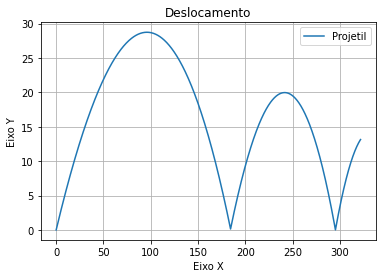

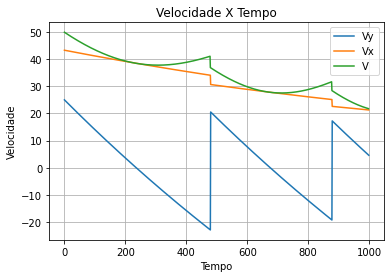

Gráfricos das energias


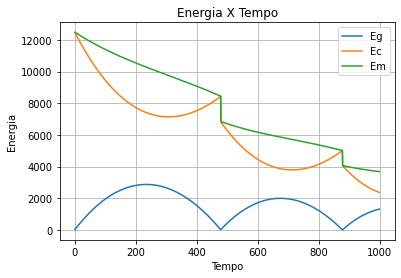

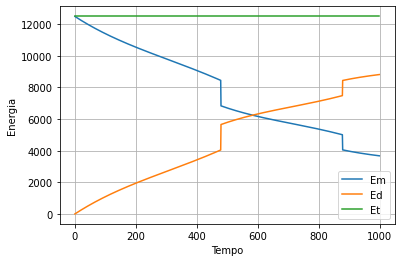

In [ ]:
plt.figure(1)
plt.plot(spx, spy, label='Projetil')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Deslocamento')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(vely, label='Vy') 
plt.plot(velx, label='Vx') 
plt.plot(vel, label = 'V') 
plt.xlabel('Tempo')
plt.ylabel('Velocidade')
plt.title('Velocidade X Tempo')
plt.legend()
plt.grid(True)
plt.show()

print('Gráfricos das energias')
plt.figure(3)
plt.plot(Eg, label='Eg')
plt.plot(Ec, label='Ec')
plt.plot(Em, label='Em')
plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.title('Energia X Tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(4)
plt.plot(Em, label='Em')
plt.plot(Ed, label='Ed')
plt.plot(Et, label='Et')
plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.legend()
plt.grid(True)
plt.show()




***ANÁLISE***
* No gráfico 1 pode-se observar que, após o lançamento, a partícula atinge a altura máxima de 28,73m, menor que a altura atingida na simulação 01, graças à diminuição do ângulo de lançamento (theta).  Além disso, a colisão com o solo neste caso é elástica, o que ocasiona na continuação do movimento. A partícula, então, realiza diversas vezes o mesmo movimento, perdendo 10% da sua energia a cada uma, até parar.
* Já no gráfico 2, percebe-se que as velocidades variam da mesma forma em cada movimento, com uma queda no seu valor absoluto a cada colisão.
* No gráfico 3 também observa-se a mesma situação da simulação anterior, porém com uma maior perda da energia mecânica devido à constante perda de energia nas colisões.
*  Ao observar o gráfico 4 e os cálculos, conclui-se que a energia dissipada neste caso é maior que no caso anterior, como consequência das colisões elásticas. Foram dissipados 8816.74J, correspondentes a 70,53% da energia total.

#Simulação 03 - Cálculos e Resultados
Angulo do lançamento:
> Theta = 30°

Porcentagem da velocidade preservada após tocar o solo:
> w = 90%

Coeficiente de atrito:
> k = 1


###Parâmetros

In [ ]:
DT = 0.01 #intervalo de tempo
g = -10 #gravidade
H = 0 #altura inicial
Tmax = 10 #tempo maximo
V0 = 50 #velocidade inicial
theta = math.radians(30) #angulo de lancamento
w = 0.9 #coef de perda de velocidade ao tocar o solo
Vy = V0*math.sin(theta)
Vx = V0*math.cos(theta)
S0 = 0

vely = [Vy] #velocidades em y
velx = [Vx] #velociaddes em x
vel = [] #velocidades
spy = [0] #posicoes em y
spx = [0] #posicoes em x

Sx = 0
Sy = 0
k = 1
m = 10

Eg = [] #Energia gravitacional
Ec = [] #Energia cinética
Em = [] #Energia Mecânica
Et = [] #Energia Total
Ed = [] #Energia Dissipada


###Cálculos

In [ ]:
for t in np.arange(DT, Tmax, DT):

    # calcula as velocidades nos eixos x e y
    DVy = (g-(k/m)*Vy)*DT
    Vy = Vy + DVy

    DVx = (-k*Vx/m)*DT
    Vx = Vx + DVx 
    
    # soma a velocidade a partir das componentes
    V = math.sqrt(Vy**2 + Vx**2)

    vely.append(Vy)
    velx.append(Vx)
    vel.append(V)

    # calcula a posicao em x e y ao passar do tempo
    Sx = Sx + DT*Vx
    Sy = Sy + DT*Vy
    
    spy.append(Sy)
    spx.append(Sx)
    
    # calcula as energias: potencial(gravitavional), cinetica, mecanica, dissipada e total
    Eg.append(-g*m*Sy)
    Ec.append(1/2*m*V**2)
    Em.append((1/2*m*V**2) + (-g*m*Sy))
    Et.append(1/2*m*V0**2)
    Ed.append ((1/2*m*V0**2)-((1/2*m*V**2) + (-g*m*Sy)))
    
    # calcula a posicao seguinte em y para saber quando toca o solo (passa pelo 0)
    DVyax = DVy
    Vyax = Vy
    DVyax = DVy
    
    DVyax = (g-(k/m)*Vy)*(DT+0.1)
    Vyax = Vyax + DVyax
    Syax = Sy + DT*Vy

    # quando toca o solo, inverte o movimento em y com perda 'w' de velocidade
    if Sx > 0 and Syax < 0 and w != 0:
       Vy=Vy*(-w)
       Vx=Vx*(w)
    if Sx > 0 and Syax < 0 and w == 0:
      break
      

In [ ]:
# Porcentagem da energia dissipada
porcentagem = ((1/2*m*V0**2)-((1/2*m*V**2) + (-g*m*Sy))) * 100 / (1/2*m*V0**2)
porcentagem = round(porcentagem, 2)
print (porcentagem,'%')

84.89 %


###Gráficos e análises

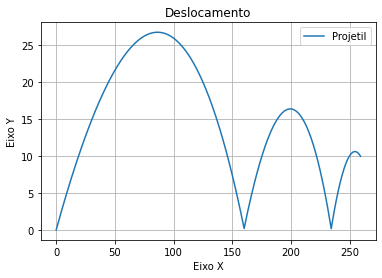

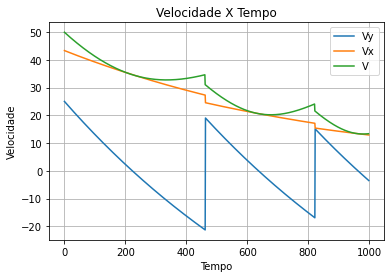

Gráfricos das energias


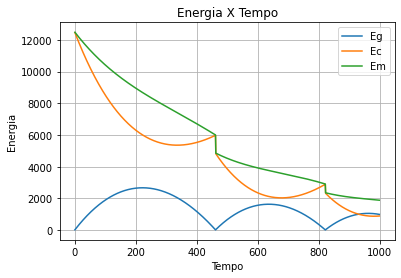

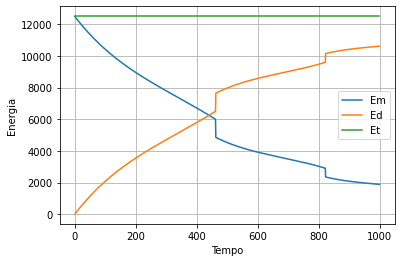

In [ ]:
plt.figure(1)
plt.plot(spx, spy, label='Projetil')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Deslocamento')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(vely, label='Vy') 
plt.plot(velx, label='Vx') 
plt.plot(vel, label = 'V') 
plt.xlabel('Tempo')
plt.ylabel('Velocidade')
plt.title('Velocidade X Tempo')
plt.legend()
plt.grid(True)
plt.show()

print('Gráfricos das energias')
plt.figure(3)
plt.plot(Eg, label='Eg')
plt.plot(Ec, label='Ec')
plt.plot(Em, label='Em')
plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.title('Energia X Tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(4)
plt.plot(Em, label='Em')
plt.plot(Ed, label='Ed')
plt.plot(Et, label='Et')
plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.legend()
plt.grid(True)
plt.show()

***ANÁLISE***

Esta simulação foi realizada com os mesmos parâmetros da simulação 02, porém com o coeficiente de atrito dobrado. O objetivo é observar com clareza a influência do atrito no movimento ao comparar esta com a anterior.

* A altura máxima atingida no movimento é de 26,71m, como observa-se no gráfico 1. Dessa forma, percebe-se que a partícula atinge uma altura menor ao sofrer um atrito maior com o ar.
* Nos gráficos 2 e 3, o que se pode perceber é uma perda mais acentuada energia mecânica e da velocidade.
* Por fim, o  gráfico 4 evidencia a maior perda de energia neste caso. A energia dissipada é de 10610,72 J, correspondendo a 84,89% da energia total.

Todas as diferenças entre as simulaçoes 02 e 03 são de influência exclusiva da força de atrito.

#Simulação 04 - Cálculos e Resultados
Angulo do lançamento:
> Theta = 60º

Porcentagem da velocidade preservada após tocar o solo:
> w = 100%

###Parâmetros

In [ ]:
DT = 0.01 #intervalo de tempo
g = -10 #gravidade
H = 0 #altura inicial
Tmax = 10 #tempo maximo
V0 = 50 #velocidade inicial
theta = math.radians(60) #angulo de lancamento
w = 1 #coef de perda de velocidade ao tocar o solo
Vy = V0*math.sin(theta)
Vx = V0*math.cos(theta)
S0 = 0

vely = [Vy] #velocidades em y
velx = [Vx] #velociaddes em x
vel = [] #velocidades
spy = [0] #posicoes em y
spx = [0] #posicoes em x

Sx = 0
Sy = 0
k = 0.5
m = 10

Eg = [] #Energia gravitacional
Ec = [] #Energia cinética
Em = [] #Energia Mecânica
Et = [] #Energia Total
Ed = [] #Energia Dissipada


###Cálculos

In [ ]:
for t in np.arange(DT, Tmax, DT):

    # calcula as velocidades nos eixos x e y
    DVy = (g-(k/m)*Vy)*DT
    Vy = Vy + DVy

    DVx = (-k*Vx/m)*DT
    Vx = Vx + DVx 
    
    # soma a velocidade a partir das componentes
    V = math.sqrt(Vy**2 + Vx**2)

    vely.append(Vy)
    velx.append(Vx)
    vel.append(V)

    # calcula a posicao em x e y ao passar do tempo
    Sx = Sx + DT*Vx
    Sy = Sy + DT*Vy
    
    spy.append(Sy)
    spx.append(Sx)
    
    # calcula as energias: potencial(gravitavional), cinetica, mecanica, dissipada e total
    Eg.append(-g*m*Sy)
    Ec.append(1/2*m*V**2)
    Em.append((1/2*m*V**2) + (-g*m*Sy))
    Et.append(1/2*m*V0**2)
    Ed.append ((1/2*m*V0**2)-((1/2*m*V**2) + (-g*m*Sy)))
    
    # calcula a posicao seguinte em y para saber quando toca o solo (passa pelo 0)
    DVyax = DVy
    Vyax = Vy
    DVyax = DVy
    
    DVyax = (g-(k/m)*Vy)*(DT+0.1)
    Vyax = Vyax + DVyax
    Syax = Sy + DT*Vy

    # quando toca o solo, inverte o movimento em y com perda 'w' de velocidade
    if Sx > 0 and Syax < 0 and w != 0:
       Vy=Vy*(-w)
       Vx=Vx*(w)
    if Sx > 0 and Syax < 0 and w == 0:
      break
      

In [ ]:
# Porcentagem da energia dissipada
porcentagem = ((1/2*m*V0**2)-((1/2*m*V**2) + (-g*m*Sy))) * 100 / (1/2*m*V0**2)
porcentagem = round(porcentagem, 2)
print (porcentagem,'%')

39.65 %


###Gráficos e Análises 

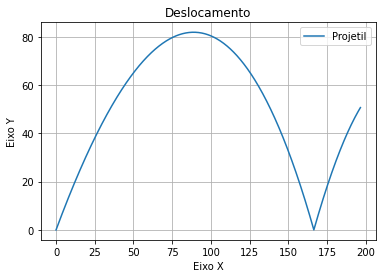

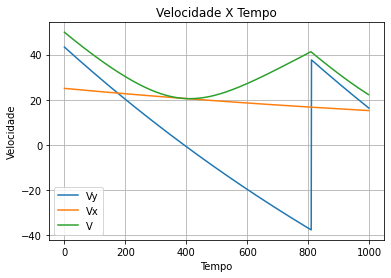

Gráfricos das energias


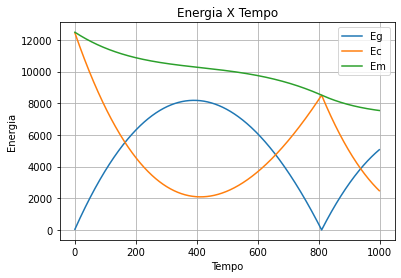

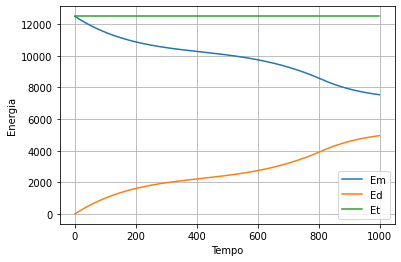

In [ ]:
plt.figure(1)
plt.plot(spx, spy, label='Projetil')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Deslocamento')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(vely, label='Vy') 
plt.plot(velx, label='Vx') 
plt.plot(vel, label = 'V') 
plt.xlabel('Tempo')
plt.ylabel('Velocidade')
plt.title('Velocidade X Tempo')
plt.legend()
plt.grid(True)
plt.show()

print('Gráfricos das energias')
plt.figure(3)
plt.plot(Eg, label='Eg')
plt.plot(Ec, label='Ec')
plt.plot(Em, label='Em')
plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.title('Energia X Tempo')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(4)
plt.plot(Em, label='Em')
plt.plot(Ed, label='Ed')
plt.plot(Et, label='Et')
plt.xlabel('Tempo')
plt.ylabel('Energia')
plt.legend()
plt.grid(True)
plt.show()


***ANÁLISE***

Neste caso, não há perda de energia nas colisões, apenas o atrito é responsável por qualquer dissipação que ocorre.

* Com o ângulo de lançamento de 60°, pode-se observar no gráfico 1 a altura máxima atingida de 81.85m.
* Nos gráficos 2 e 3, percebe-se uma suave queda nos valores das velocidades e das energias. 
* O gráfico 4 confirma o que foi observado nos demais. A dissipação da energia  causada só pelo atrito é baixa em comparação à que ocorre juntando a força de atrito e a perda nas colisões. Foi dissipada neste caso 39.65 % da energia total.

# Conclusões do trabalho


Foram feitas várias simulações de lançamento oblíquo de um projétil de massa 10. Foram mudados alguns parâmetros para observar o comportamento do projétil em relação a essas mudanças. Nesse contexto, foi possível tirar algumas conclusões.

Quanto maior o ângulo de lançamento (theta) maior é a altura que o projétil chega e o inverso também acontece, quanto menor o ângulo de lançamento, menor é a altura que o projétil alcança. Dessa forma também é possível concluir que, ao ser lançado de um ângulo menor, o projétil alcança uma distância menor em relação ao ponto inicial, e vice-versa.

A energia total é sempre constante, mas a energia mecânica se dissipa por conta do atrito, se transformando em energia térmica. Pelo gráfico das energias também é possível observar que, quanto menor o ângulo que o projétil é lançado, mais rápido ele chega ao solo, ou seja, menor é o tempo do trajeto.

Caso o contato com o solo for elástico, a cada toque no solo, por conta do atrito, a bola perde mais energia e consequentemente velocidade, até o momento em que ela entra em repouso.

Em relação a velocidade, podemos observar que a velocidade do projétil ao tocar o chão é o mesmo para todos os ângulos simulados, exceto quando o coeficiente de atrito(k) foi alterado.